In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

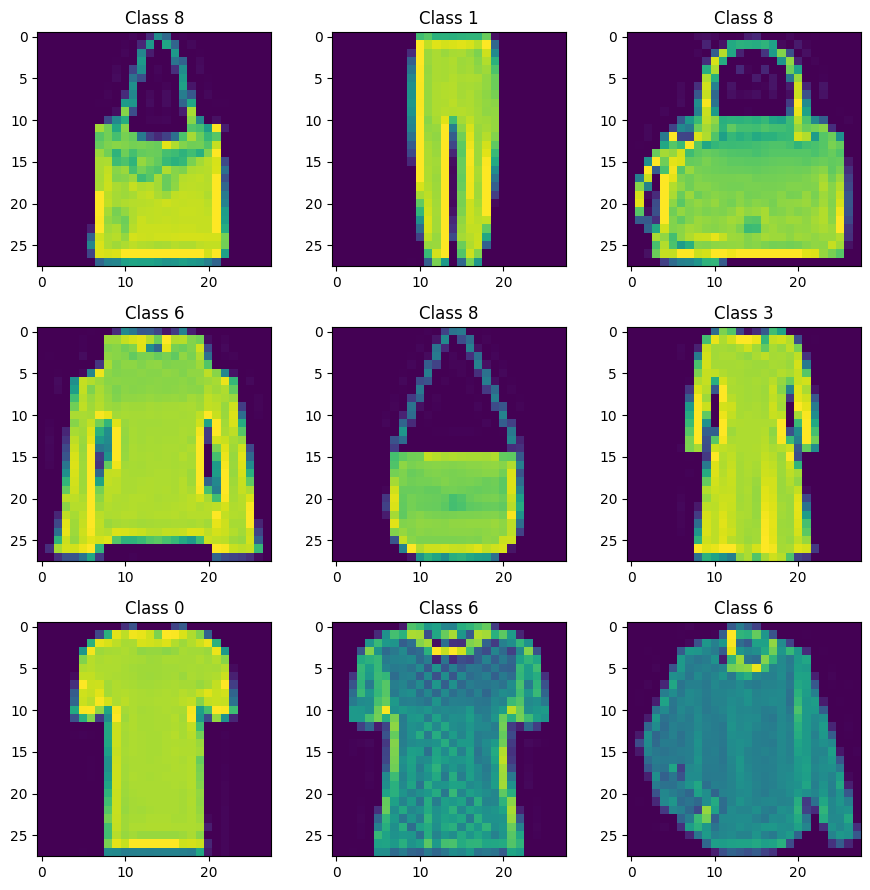

In [3]:
# display some images
import matplotlib.pyplot as plt
import random 

plt.rcParams['figure.figsize'] = (9,9) 

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [4]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [5]:
from tensorflow.keras.utils import to_categorical
nb_classes = 10 # 10 classes

Y_train = to_categorical(y_train, nb_classes) # encoding the lables
Y_test = to_categorical(y_test, nb_classes)

In [6]:
# this is first model, i used relu and adam
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),  
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')  
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, Y_train, epochs=2, batch_size=16, verbose=1, validation_split=0.2)

Epoch 1/2


3000/3000 [==============================] - 58s 19ms/step - loss: 0.5780 - accuracy: 0.7942 - val_loss: 0.4318 - val_accuracy: 0.8444
Epoch 2/2
3000/3000 [==============================] - 53s 18ms/step - loss: 0.4292 - accuracy: 0.8482 - val_loss: 0.3817 - val_accuracy: 0.8662


In [10]:
# testing the model
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.4074 - accuracy: 0.8547
Test score: 0.40735068917274475
Test accuracy: 0.8547000288963318


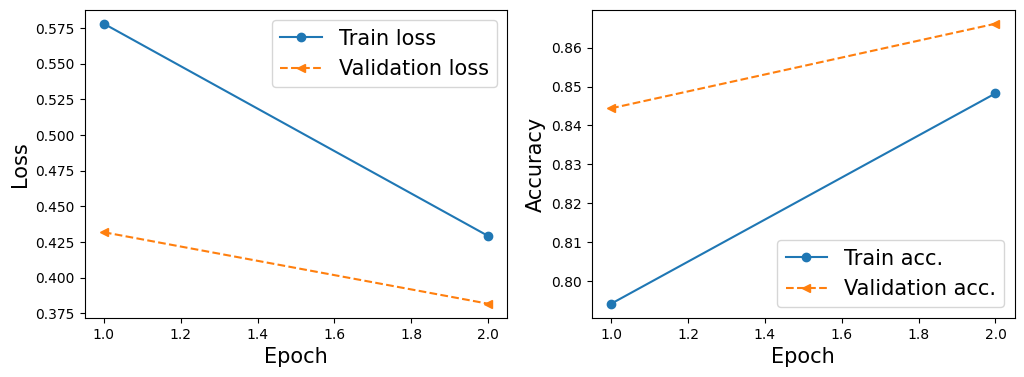

In [11]:
# model training, test loss and acc charts
import numpy as np 

hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/15_12.png', dpi=300)
plt.show()

313/313 [==============================] - 1s 3ms/step


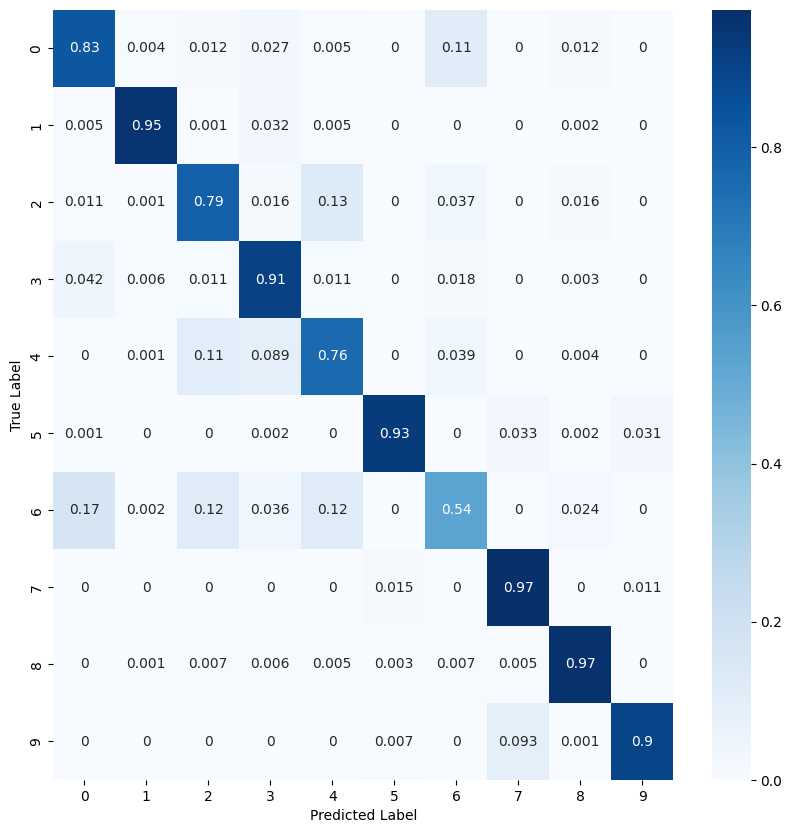

acc: 0.8547
precision:  0.8538821455033198
recall:  0.8547
f1 score: 0.8521889430693663


In [12]:
# confusion matrixs
from sklearn_evaluation import plot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 10]

pre = model.predict(X_test)
pre = tf.argmax(pre, axis=1).numpy()

cm = confusion_matrix(y_test, pre, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


print("acc:",accuracy_score(y_test, pre))
print("precision: ",precision_score(y_test, pre, average='macro'))
print("recall: ",recall_score(y_test, pre,average='macro'))
print("f1 score:",f1_score(y_test, pre,average='macro'))



In [13]:
# this is second model i used sigmoid and sgd
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='sigmoid', input_shape=(X_train.shape[1],)),  
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')  
])

In [14]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              803840    
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)               

In [15]:
model1.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history1 = model1.fit(X_train, Y_train, epochs=2, batch_size=16, verbose=1, validation_split=0.2)

Epoch 1/2
3000/3000 [==============================] - 19s 6ms/step - loss: 2.3466 - accuracy: 0.1025 - val_loss: 2.2991 - val_accuracy: 0.0957
Epoch 2/2
3000/3000 [==============================] - 19s 6ms/step - loss: 2.3112 - accuracy: 0.1047 - val_loss: 2.2972 - val_accuracy: 0.1192


In [17]:
score = model1.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 2.2967 - accuracy: 0.1218
Test score: 2.2966880798339844
Test accuracy: 0.121799997985363


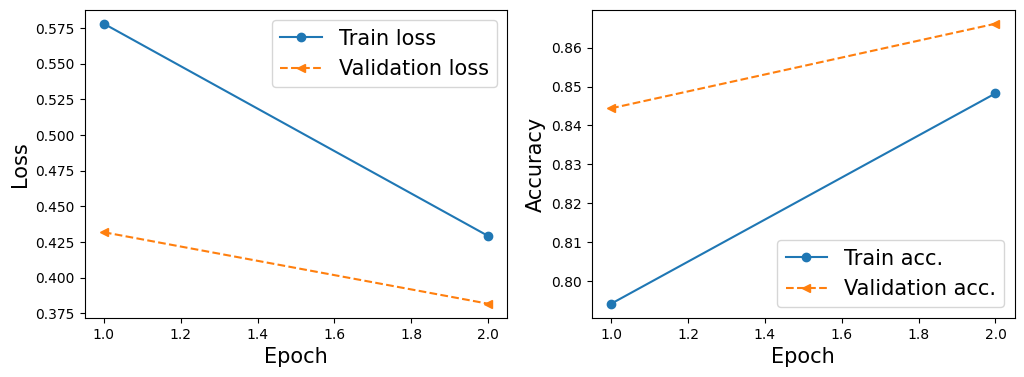

In [18]:
import numpy as np 
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/15_12.png', dpi=300)
plt.show()

313/313 [==============================] - 1s 4ms/step


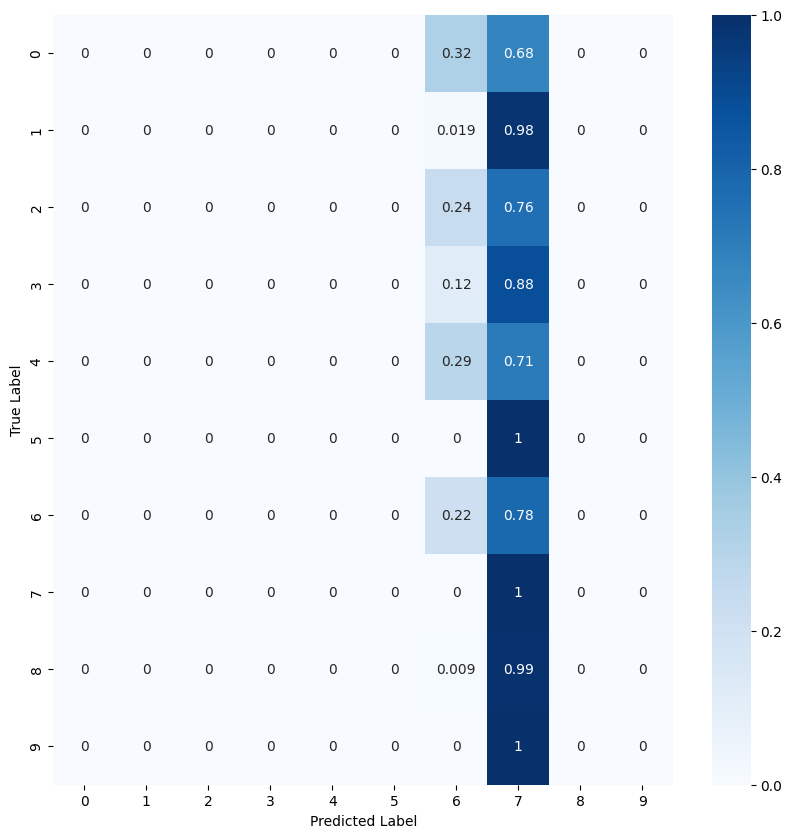

acc: 0.1218
precision:  0.029311966733774324
recall:  0.12179999999999999
f1 score: 0.04011662745630529


C:\Users\cappr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
from sklearn_evaluation import plot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 10]

pre1 = model1.predict(X_test)
pre1 = tf.argmax(pre1, axis=1).numpy()

cm = confusion_matrix(y_test, pre1, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


print("acc:",accuracy_score(y_test, pre))
print("precision: ",precision_score(y_test, pre, average='macro'))
print("recall: ",recall_score(y_test, pre,average='macro'))
print("f1 score:",f1_score(y_test, pre,average='macro'))



In [ ]:
"""
as you can see model performed way worst when using sigmoid activation function and sgd optimizer, this shows that 
choosing the right activation function and optimizer is important.
"""